Test with Acropora abrolhosensis https://www.marinespecies.org/aphia.php?p=taxdetails&id=288182
aphiaID = 288182  
urn = urn:lsid:marinespecies.org:taxname:288182

In [75]:
import json
from urllib.request import urlopen
import pandas as pd

In [76]:
base = 'https://api.obis.org/v3/'

aphiaID = '288182'

occurrence_id = 'occurrence?taxonid={}'.format(aphiaID)

#taxon_id = 'taxon/{}'.format(aphiaID)
#taxon_sn = 'taxon/{}'.format(scientificname)

url = '{}{}'.format(base,occurrence_id)

url

'https://api.obis.org/v3/occurrence?taxonid=288182'

In [77]:
response= urlopen(url)

data_json = json.loads(response.read())
data_json['results']

data = pd.DataFrame(data_json['results'])
data.head()

,brackish,scientificNameID,scientificName,absence,dropped,genusid,aphiaID,decimalLatitude,subclassid,originalScientificName,...,organismQuantityType,scientificNameAuthorship,fieldNumber,language,datasetName,geodeticDatum,waterBody,occurrenceRemarks,locality,country
0,False,urn:lsid:marinespecies.org:taxname:288182,Acropora abrolhosensis,False,False,205469,288182,-20.530001,1340,Acropora abrolhosensis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,urn:lsid:marinespecies.org:taxname:288182,Acropora abrolhosensis,False,False,205469,288182,-8.616660,1340,Acropora abrolhosensis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,urn:lsid:marinespecies.org:taxname:288182,Acropora abrolhosensis,False,False,205469,288182,-28.730000,1340,Acropora abrolhosensis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,urn:lsid:marinespecies.org:taxname:288182,Acropora abrolhosensis,False,False,205469,288182,-17.200000,1340,Acropora abrolhosensis,...,individuals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,urn:lsid:marinespecies.org:taxname:288182,Acropora abrolhosensis,False,False,205469,288182,-0.500000,1340,Acropora abrolhosensis,...,NaN,"Veron, 1985",2506140,en,South Pacific Regional Fisheries Management Or...,WGS84,Pacific Ocean,VME Group = Scleractinia; Source = OBIS Hexaco...,NaN,NaN


In [83]:
data.columns.tolist()

['brackish',
 'scientificNameID',
 'scientificName',
 'absence',
 'dropped',
 'genusid',
 'aphiaID',
 'decimalLatitude',
 'subclassid',
 'originalScientificName',
 'marine',
 'phylumid',
 'familyid',
 'catalogNumber',
 'basisOfRecord',
 'terrestrial',
 'institutionCode',
 'id',
 'class',
 'order',
 'orderid',
 'dataset_id',
 'decimalLongitude',
 'collectionCode',
 'speciesid',
 'occurrenceID',
 'kingdom',
 'classid',
 'phylum',
 'genus',
 'species',
 'subclass',
 'family',
 'category',
 'kingdomid',
 'node_id',
 'flags',
 'sss',
 'shoredistance',
 'sst',
 'bathymetry',
 'date_year',
 'coordinateUncertaintyInMeters',
 'taxonRank',
 'occurrenceStatus',
 'date_mid',
 'modified',
 'footprintWKT',
 'date_end',
 'specificEpithet',
 'date_start',
 'eventDate',
 'minimumDepthInMeters',
 'maximumDepthInMeters',
 'depth',
 'individualCount',
 'organismQuantity',
 'organismQuantityType',
 'scientificNameAuthorship',
 'fieldNumber',
 'language',
 'datasetName',
 'geodeticDatum',
 'waterBody',
 'oc

<AxesSubplot:>

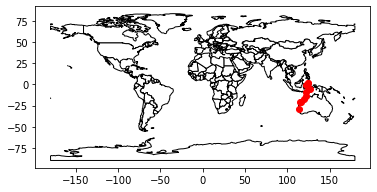

In [78]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.decimalLongitude, data.decimalLatitude))

ax = world.plot(
    color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')

C:\Users\Mathew.Biddle\programs\Anaconda3\envs\sandbox\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mathew.Biddle\programs\Anaconda3\envs\sandbox\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<GeoAxesSubplot:>

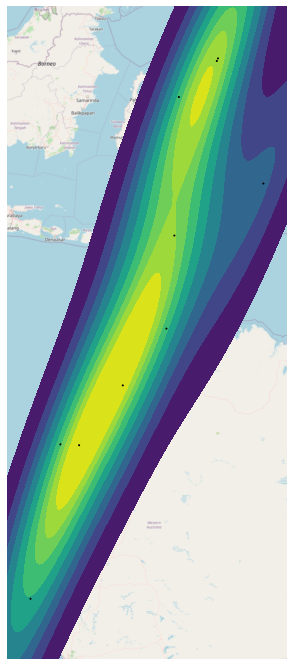

In [79]:
import geoplot

ax = geoplot.kdeplot(
    gdf,
    shade=True, 
    cmap='viridis',
    projection=geoplot.crs.WebMercator(),
    figsize=(12,12),
    )

geoplot.pointplot(gdf, s=1, color='black', ax=ax)
geoplot.webmap(gdf, ax=ax, legend=True)

#geoplot.polyplot(gdf, ax=ax, zorder=1)

<AxesSubplot:>

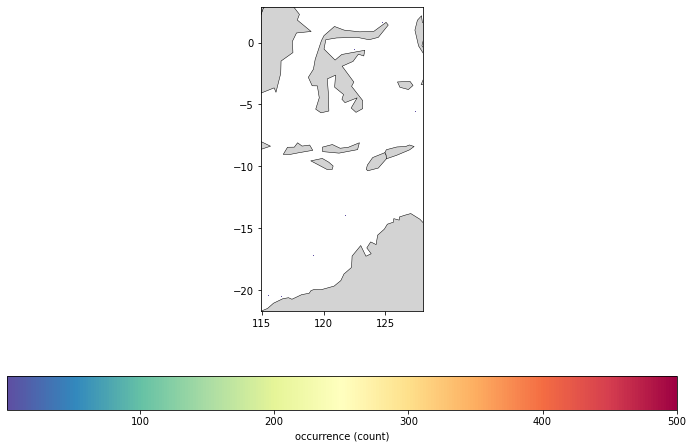

In [80]:
import numpy as np
import shapely
import matplotlib.pyplot as plt

# total area for the grid
xmin, ymin, xmax, ymax= gdf.total_bounds
# how many cells across and down
n_cells=180
cell_size = (xmax-xmin)/n_cells
# projection of the grid
#crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"
# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
        
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'],) 
                                 #crs=crs)
    
# ax = gdf.plot(markersize=.1, figsize=(12, 8),)# column='dob', cmap='jet')
# plt.autoscale(False)
# cell.plot(ax=ax, facecolor="none", edgecolor='grey')
# ax.axis("off")

merged = gpd.sjoin(gdf, cell, how='left', op='within')

# make a simple count variable that we can sum
merged['n_occur'] = 1
# Compute stats per grid cell -- aggregate fires to grid cells with dissolve
dissolve = merged.dissolve(by="index_right", aggfunc="count")
# put this into cell
cell.loc[dissolve.index, 'n_occur'] = dissolve.n_occur.values

ax = cell.plot(column='n_occur', figsize=(12, 8), cmap='Spectral_r', vmin=1, vmax=500, edgecolor=None, legend=True,
              legend_kwds={'label': "occurrence (count)",
                                            'orientation': "horizontal"},
              )

plt.autoscale(False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.to_crs("EPSG:4326").plot(ax=ax, 
                               color='lightgrey', 
                               edgecolor='black',
                               linewidth=.5, 
                               legend=True,
                               legend_kwds={'label': "occurrence (count)",
                                            'orientation': "horizontal"},
                               )

In [81]:
gdf.total_bounds

array([113.76999664, -28.72999954, 127.4700012 ,   1.76999998])

Now try for searching the order [Scleractinia](https://www.marinespecies.org/aphia.php?p=taxdetails&id=1363) and drill down to all species. 

**AphiaID** 1363  (urn:lsid:marinespecies.org:taxname:1363) 

Use WoRMS REST service
https://www.marinespecies.org/rest/ and test for one search

In [4]:
# base = 'https://www.marinespecies.org/rest/'

# orderID = '1363'

# family_childs = 'AphiaChildrenByAphiaID/{}'.format(orderID) # get all children

# offset = 1 # Starting recordnumber, when retrieving next chunk of (50) records. Default=1

# worms_url = '{}{}?marine_only=true&offset={}'.format(base,family_childs,offset)

# worms_url

'https://www.marinespecies.org/rest/AphiaChildrenByAphiaID/1363?marine_only=true&offset=1'

Collect all the AphiaIDs for the families associated with [Scleractinia](https://www.marinespecies.org/aphia.php?p=taxdetails&id=1363)

The service only provides 50 records, so we need to iterate by 50 until we get less than 50 responses

Need to follow the Taxonomy Classification from order down:
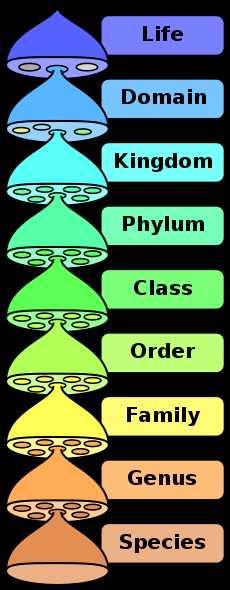

In [5]:
# worms_df = pd.DataFrame()

# for i in range(1,100000,50):
#     offset = i
#     worms_url = '{}{}?marine_only=true&offset={}'.format(base,family_childs,offset)
#     response = urlopen(worms_url)
#     data_json = json.loads(response.read())
#     worms_df = pd.concat([worms_df,pd.DataFrame(data_json)])
#     if len(data_json) < 50:
#         break

        
# worms_df = worms_df[worms_df['rank']=='Family']    # only use family 

# worms_df.shape

(189, 27)

Collect all the genuses associated with the family collected above.

In [ ]:
# for aphia in worms_df['AphiaID'].unique():
#     for i in range(1,100000,50):
#         offset = i
#         worms_url = '{}{}?marine_only=true&offset={}'.format(base,aphia,offset)
#         try:
#             response = urlopen(worms_url)
#             data_json = json.loads(response.read())
#             worms_df = pd.concat([worms_df,pd.DataFrame(data_json)])
#             if len(data_json) < 50:
#                 break
#         except:
#             continue
# worms_df.shape

'https://api.obis.org/v3/196095?marine_only=true&offset=1'

Now look for each aphia ID in OBIS and build a mongo data frame.

In [4]:
# base = 'https://api.obis.org/v3/'

# data = pd.DataFrame()

# for aphiaID in worms_df['AphiaID']:

#     occurrence_id = 'occurrence?taxonid={}'.format(aphiaID)
#     url = '{}{}'.format(base,occurrence_id)
#     response= urlopen(url)
#     data_json = json.loads(response.read())
#     data_json['results']
#     data = pd.concat([data, pd.DataFrame(data_json['results'])])
#     #data.head()

# data.describe()

,date_year,genusid,aphiaID,decimalLatitude,subclassid,phylumid,familyid,date_mid,orderid,decimalLongitude,...,shoredistance,sst,bathymetry,speciesid,minimumDepthInMeters,maximumDepthInMeters,depth,subgenusid,subspeciesid,subfamilyid
count,301.000000,4.170000e+02,4.170000e+02,417.000000,417.0,417.0,4.170000e+02,3.010000e+02,417.0,417.000000,...,4.170000e+02,386.000000,417.000000,3.610000e+02,280.000000,275.000000,281.000000,17.000000,3.000000,20.000000
mean,1991.734219,3.555494e+05,4.135435e+05,2.340429,1340.0,1267.0,5.288260e+05,7.018306e+11,1363.0,25.177510,...,2.763485e+04,25.352617,234.127194,4.096589e+05,191.442133,207.604834,199.463571,509431.705882,287363.333333,718677.400000
std,30.967765,3.627616e+05,3.892359e+05,22.691896,0.0,0.0,4.884185e+05,9.773600e+11,0.0,119.122849,...,1.644702e+05,4.337449,673.804389,3.761626e+05,418.525051,437.040267,424.189335,1641.510119,878.920550,5.335087
min,1775.000000,1.350850e+05,1.350870e+05,-55.533333,1340.0,1267.0,1.350730e+05,-6.137856e+12,1363.0,-178.419998,...,-5.743580e+05,-0.330000,-895.000000,1.351350e+05,0.000000,0.000000,0.000000,503252.000000,286726.000000,718667.000000
25%,1984.000000,2.041480e+05,2.072250e+05,-17.350000,1340.0,1267.0,1.960950e+05,4.495392e+11,1363.0,-79.583000,...,1.290000e+02,25.080000,-2.000000,2.073870e+05,5.000000,10.000000,8.500000,509582.000000,286862.000000,718680.000000
50%,2002.000000,2.056470e+05,2.870800e+05,6.382230,1340.0,1267.0,1.961050e+05,1.029024e+12,1363.0,46.049999,...,1.525000e+03,26.625000,16.600000,2.874440e+05,39.000000,40.000000,41.000000,510036.000000,286998.000000,718680.000000
75%,2009.000000,2.676600e+05,2.911190e+05,20.616667,1340.0,1267.0,7.185850e+05,1.253923e+12,1363.0,145.478000,...,1.615700e+04,28.120000,193.000000,2.911190e+05,275.750000,300.000000,291.500000,510037.000000,287682.000000,718680.000000
max,2019.000000,1.440307e+06,1.511284e+06,64.169998,1340.0,1267.0,1.507871e+06,1.568938e+12,1363.0,178.929993,...,2.227290e+06,29.870000,4752.770000,1.511284e+06,3978.000000,3978.000000,3978.000000,510037.000000,288366.000000,718680.000000


Total # of occurrences: 858492


(10000, 168)

'02f9d495-d660-4aa2-b117-bc2a9ed0b7cb'

In [65]:
base = 'https://api.obis.org/v3/'

aphiaID = '1363'
size = 1

occurrence_id = 'occurrence?taxonid={}&size={}'.format(aphiaID,size)
url = '{}{}'.format(base,occurrence_id)
response= urlopen(url)
data_json = json.loads(response.read())
size = data_json['total']

data = pd.DataFrame() # initialize df


# The API limits responses to 10,000 entries, so we need to iterate by 10k and use the last occurrence
# uuid to set after "Occurrence UUID up to which to skip."
for i in range(10000,size,10000):
    if i == 10000:
        # build url for first call
        #occurrence_id = 'occurrence?taxonid={}&size=10000'.format(aphiaID)
        occurrence_id = 'occurrence?taxonid={}&fields=decimalLatitude%2CdecimalLongitude%2CoccurrenceID%2Cid&size=10000'.format(aphiaID)
    else:
        # build url for remaining calls
        uuid = data.iloc[-1]['id']
        #occurrence_id = 'occurrence?taxonid={}&after={}&size=10000'.format(aphiaID,uuid)
        occurrence_id = 'occurrence?taxonid={}&fields=decimalLatitude%2CdecimalLongitude%2CoccurrenceID%2Cid&after={}&size=10000'.format(aphiaID,uuid)
        
    url = '{}{}'.format(base,occurrence_id)
    # open the api call
    response= urlopen(url) 
    # read in the json
    data_json = json.loads(response.read())
    # build a mongo dataframe with all results
    data = pd.concat([data, pd.DataFrame(data_json['results'])])
    
    print(len(data_json['results']),data.shape)
    
    # kick out of loop at the end
    if len(data_json['results']) < 10000:
        break

# Need to grab from last iteration to expected size.
uuid = data.iloc[-1]['id']
occurrence_id = 'occurrence?taxonid={}&fields=decimalLatitude%2CdecimalLongitude%2CoccurrenceID%2Cid&after={}&size=10000'.format(aphiaID,uuid)
url = '{}{}'.format(base,occurrence_id)
response= urlopen(url)
data_json = json.loads(response.read())
data_json['results']
data = pd.concat([data, pd.DataFrame(data_json['results'])])
print(len(data_json['results']),data.shape)        

data.shape

10000 (10000, 4)
10000 (20000, 4)
10000 (30000, 4)
10000 (40000, 4)
10000 (50000, 4)
10000 (60000, 4)
10000 (70000, 4)
10000 (80000, 4)
10000 (90000, 4)
10000 (100000, 4)
10000 (110000, 4)
10000 (120000, 4)
10000 (130000, 4)
10000 (140000, 4)
10000 (150000, 4)
10000 (160000, 4)
10000 (170000, 4)
10000 (180000, 4)
10000 (190000, 4)
10000 (200000, 4)
10000 (210000, 4)
10000 (220000, 4)
10000 (230000, 4)
10000 (240000, 4)
10000 (250000, 4)
10000 (260000, 4)
10000 (270000, 4)
10000 (280000, 4)
10000 (290000, 4)
10000 (300000, 4)
10000 (310000, 4)
10000 (320000, 4)
10000 (330000, 4)
10000 (340000, 4)
10000 (350000, 4)
10000 (360000, 4)
10000 (370000, 4)
10000 (380000, 4)
10000 (390000, 4)
10000 (400000, 4)
10000 (410000, 4)
10000 (420000, 4)
10000 (430000, 4)
10000 (440000, 4)
10000 (450000, 4)
10000 (460000, 4)
10000 (470000, 4)
10000 (480000, 4)
10000 (490000, 4)
10000 (500000, 4)
10000 (510000, 4)
10000 (520000, 4)
10000 (530000, 4)
10000 (540000, 4)
10000 (550000, 4)
10000 (560000, 4)
1

(850000, 4)

8492 (858492, 4)


In [15]:
## Just pulling the coordinates
# base = 'https://api.obis.org/v3/'

# aphiaID = '1363'

# occurrence_points = 'occurrence/points?taxonid={}'.format(aphiaID)
# url = '{}{}'.format(base,occurrence_points)
# response= urlopen(url)
# data_json = json.loads(response.read())
# data = pd.DataFrame(data_json['coordinates'])
# data.shape

(10000, 2)

858492

array([False])

Now make a heatmap of all the points.

C:\Users\Mathew.Biddle\programs\Anaconda3\envs\sandbox\lib\site-packages\geoplot\geoplot.py:716: UserWarning: Could not set plot extent successfully due to numerical instability. Try setting extent manually. Defaulting to a global extent.
  warnings.warn(
C:\Users\Mathew.Biddle\programs\Anaconda3\envs\sandbox\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mathew.Biddle\programs\Anaconda3\envs\sandbox\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Mathew.Biddle\programs\Anaconda3\envs\sandbox\lib\site-packages\geoplot\geoplot.py:716: UserWarning: Could not set plot exte

<GeoAxesSubplot:>

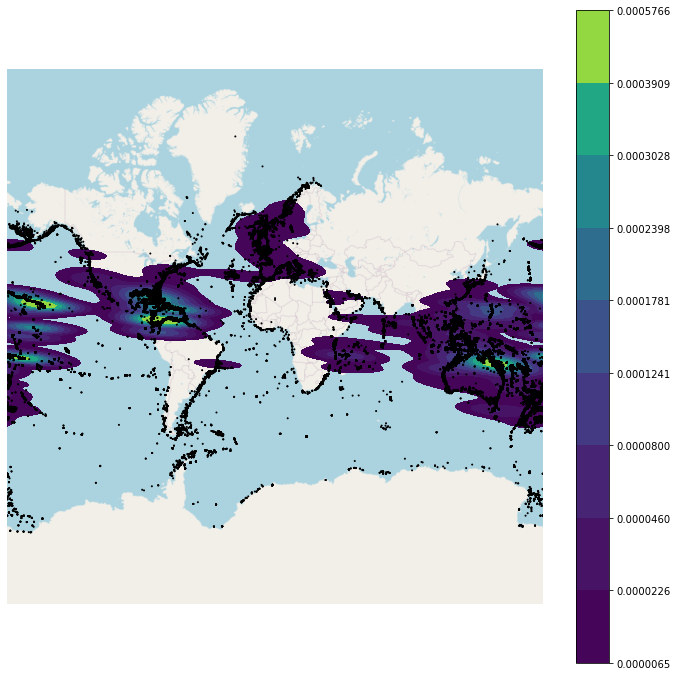

In [72]:
import geoplot
import geopandas as gpd

gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.decimalLongitude, data.decimalLatitude))

ax = geoplot.kdeplot(
    gdf,
    shade=True, 
    cmap='viridis',
    projection=geoplot.crs.WebMercator(),
    figsize=(12,12),
    cbar=True,
    )

geoplot.pointplot(gdf, s=1, color='black', ax=ax)
geoplot.webmap(gdf, ax=ax, legend=True)

## Need to mask by land so heatmap doesn't cover land.

Make a simple map

<AxesSubplot:>

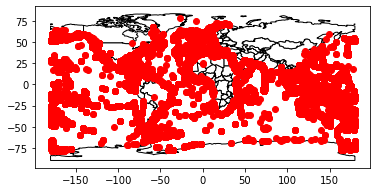

In [68]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.decimalLongitude, data.decimalLatitude))

ax = world.plot(
    color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')

Now to the gridding https://james-brennan.github.io/posts/fast_gridding_geopandas/

<AxesSubplot:>

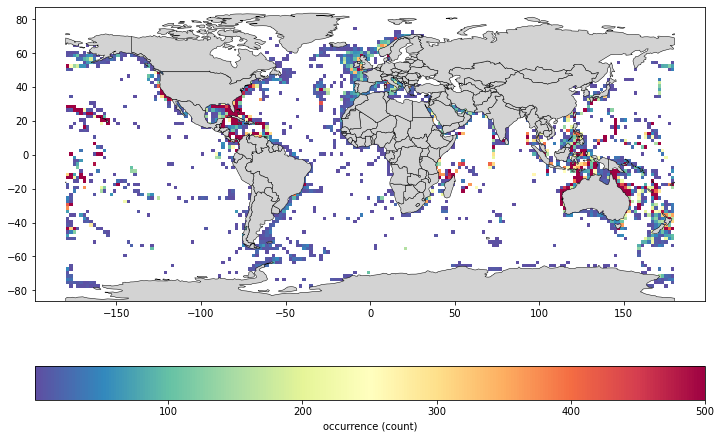

In [74]:
import numpy as np
import shapely
import matplotlib.pyplot as plt

# total area for the grid
xmin, ymin, xmax, ymax= gdf.total_bounds
# how many cells across and down
n_cells=180
cell_size = (xmax-xmin)/n_cells
# projection of the grid
#crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"
# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
        
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'],) 
                                 #crs=crs)
    
# ax = gdf.plot(markersize=.1, figsize=(12, 8),)# column='dob', cmap='jet')
# plt.autoscale(False)
# cell.plot(ax=ax, facecolor="none", edgecolor='grey')
# ax.axis("off")

merged = gpd.sjoin(gdf, cell, how='left', op='within')

# make a simple count variable that we can sum
merged['n_occur'] = 1
# Compute stats per grid cell -- aggregate fires to grid cells with dissolve
dissolve = merged.dissolve(by="index_right", aggfunc="count")
# put this into cell
cell.loc[dissolve.index, 'n_occur'] = dissolve.n_occur.values

ax = cell.plot(column='n_occur', figsize=(12, 8), cmap='Spectral_r', vmin=1, vmax=500, edgecolor=None, legend=True,
              legend_kwds={'label': "occurrence (count)",
                                            'orientation': "horizontal"},
              )

plt.autoscale(False)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.to_crs("EPSG:4326").plot(ax=ax, 
                               color='lightgrey', 
                               edgecolor='black',
                               linewidth=.5, 
                               legend=True,
                               legend_kwds={'label': "occurrence (count)",
                                            'orientation': "horizontal"},
                               )
#world.to_crs("ESRI:54009").plot(ax=ax, color='none', edgecolor='black',linewidth=.5)

#ax.axis('off')

In [70]:
cell['n_occur'].describe()

count     2088.000000
mean       407.430077
std       2254.728628
min          1.000000
25%          4.000000
50%         16.000000
75%        103.000000
max      48659.000000
Name: n_occur, dtype: float64